In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 8})

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# I. LOAD DATA

In [3]:
train = pd.read_csv('./Data/train_clean.csv') 

In [4]:
train.head()

,Unnamed: 0,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeHome,YrsSinceRemodel,Num_Bathrms_AbvGrd,Num_Bathrms_Bsmt,log_SalePrice,hasBsmt,hasGarage
0,0,0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,3,1,Gd,8,Typ,0,NoFirePlace,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NoPool,NoFence,None,0,2,2008,WD,Normal,208500,5,5,3,1,12.247694,Basement,Garage
1,1,1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NoPool,NoFence,None,0,5,2007,WD,Normal,181500,31,31,2,1,12.109011,Basement,Garage
2,2,2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NoPool,NoFence,None,0,9,2008,WD,Normal,223500,7,6,3,1,12.317167,Basement,Garage
3,3,3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NoPool,NoFence,None,0,2,2006,WD,Abnorml,140000,91,36,1,1,11.849398,Basement,Garage
4,4,4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NoPool,NoFence,None,0,12,2008,WD,Normal,250000,8,8,3,1,12.429216,Basement,Garage


In [5]:
train = train.drop('Unnamed: 0', axis=1)
train = train.drop('index', axis=1)

In [6]:
# Ensure these variabes are categorical
train['MSSubClass'] = train['MSSubClass'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)
train['YrSold'] = train['YrSold'].astype(str)

In [7]:
train.shape[0]

1441

In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeHome,YrsSinceRemodel,Num_Bathrms_AbvGrd,Num_Bathrms_Bsmt,log_SalePrice,hasBsmt,hasGarage
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,3,1,Gd,8,Typ,0,NoFirePlace,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NoPool,NoFence,None,0,2,2008,WD,Normal,208500,5,5,3,1,12.247694,Basement,Garage
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NoPool,NoFence,None,0,5,2007,WD,Normal,181500,31,31,2,1,12.109011,Basement,Garage
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NoPool,NoFence,None,0,9,2008,WD,Normal,223500,7,6,3,1,12.317167,Basement,Garage
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NoPool,NoFence,None,0,2,2006,WD,Abnorml,140000,91,36,1,1,11.849398,Basement,Garage
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NoPool,NoFence,None,0,12,2008,WD,Normal,250000,8,8,3,1,12.429216,Basement,Garage


## The Variables

In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_train = train.select_dtypes(include=numerics)
numlist_all = list(num_train)
print(len(numlist_all),' numerical variables')
print(list(numlist_all))

33  numerical variables
['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'AgeHome', 'YrsSinceRemodel', 'Num_Bathrms_AbvGrd', 'Num_Bathrms_Bsmt', 'log_SalePrice']


In [10]:
cattypes = ['O']
cat_train = train.select_dtypes(include=cattypes)
catlist_all = list(cat_train)
print(len(catlist_all),' categorical variables')
print(catlist_all)

48  categorical variables
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'hasBsmt', 'hasGarage']


# II. Preprocessing 

#### 1. Separate the input and output variable(s): create new dataframes

In [11]:
# Remove 'SalePrice' and 'Id' from the numlist
numlist_all.remove('SalePrice')
numlist_all.remove('log_SalePrice')
numlist_all.remove('Id')

In [12]:
import numpy.ma as ma # need this to allow corrcoef to handle the nan rows

numlist = list()
corr_thrshld = 0.15

for nvar in numlist_all:
       
    r = ma.corrcoef(ma.masked_invalid(train[nvar]), 
                ma.masked_invalid(train['log_SalePrice']))

    if np.abs(r[0,1]) >= corr_thrshld:
        
        numlist.append(nvar)

print('Original list had ', len(numlist_all),' numerical variables')
print('Reduced list has ', len(numlist),' numerical variables \n')
print(numlist)

Original list had  30  numerical variables
Reduced list has  22  numerical variables 

['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'AgeHome', 'YrsSinceRemodel', 'Num_Bathrms_AbvGrd', 'Num_Bathrms_Bsmt']


In [13]:
# Remove similar Numerical variables
# numlist.remove('Var')

In [14]:
#numlist = ['OverallQual','GrLivArea',
#           'TotalBsmtSF','FullBath',
#           'GarageCars','AgeHome',
#           'YrsSinceRemodel'] # testing

In [15]:
# Let's reduce the list of categorical variables
# For each variable, running an anova to determine 
      # if there is a significant difference in mean SalePrice 
      #  between the differenct options of the given variable
        
import statsmodels.api as sm
from statsmodels.formula.api import ols

catlist = list()

for cvar in catlist_all: 
    # Group Difference
    mstr = 'SalePrice ~ ' + cvar
    mod = ols(mstr,data=train).fit()                
    aov_table = sm.stats.anova_lm(mod, typ=2)
    
    eff_size_temp = (aov_table['sum_sq'][0])/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
    
    if aov_table['PR(>F)'][0] <= 0.01 and eff_size_temp > 0.059:
        catlist.append(cvar)

print('Original list had ', len(catlist_all),' categorical variables')
print('Reduced list has ', len(catlist),' categorical variables \n')
print(catlist)

Original list had  48  categorical variables
Reduced list has  26  categorical variables 

['MSSubClass', 'MSZoning', 'LotShape', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType', 'SaleCondition', 'hasGarage']


In [16]:
# Remove similar Categorical variables
# catlist.remove('Var')

In [17]:
#catlist = ['ExterQual', 'BsmtQual', 'KitchenQual',
#          'Neighborhood', 'MSZoning','BsmtCond',
#          'CentralAir','PoolQC'] # testing

In [18]:
# CONCATENATE!! the numerical and categorical
inputs_vars = numlist 
print(inputs_vars)

['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'AgeHome', 'YrsSinceRemodel', 'Num_Bathrms_AbvGrd', 'Num_Bathrms_Bsmt']


In [19]:
PriceFeatures = train[inputs_vars].copy()

In [20]:
PriceFeatures.head()

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,AgeHome,YrsSinceRemodel,Num_Bathrms_AbvGrd,Num_Bathrms_Bsmt
0,65.0,8450,7,196.0,706,150,856,856,854,1710,3,1,8,0,2,548,0,61,5,5,3,1
1,80.0,9600,6,0.0,978,284,1262,1262,0,1262,3,1,6,1,2,460,298,0,31,31,2,1
2,68.0,11250,7,162.0,486,434,920,920,866,1786,3,1,6,1,2,608,0,42,7,6,3,1
3,60.0,9550,7,0.0,216,540,756,961,756,1717,3,1,7,1,3,642,0,35,91,36,1,1
4,84.0,14260,8,350.0,655,490,1145,1145,1053,2198,4,1,9,1,3,836,192,84,8,8,3,1


##### Which Columns Are Numeric? Need this information later.

In [21]:
nlist = list(PriceFeatures.select_dtypes('number'))
print('Numerical Column Names: \n', nlist)

num_indx = []
for nvar in nlist:
    num_indx.append(PriceFeatures.select_dtypes('number').columns.get_loc(nvar))
    
print('\nNumerical Columns Indices: \n', num_indx)

Numerical Column Names: 
 ['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'AgeHome', 'YrsSinceRemodel', 'Num_Bathrms_AbvGrd', 'Num_Bathrms_Bsmt']

Numerical Columns Indices: 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


##### The Dependent Variable 🎯

In [22]:
Price = train['SalePrice']

In [23]:
log_Price = train['log_SalePrice']

SalePrice is right skewed (left plot).
For the output/dependent variable, the log of SalePrice taken.
This is so the residuals of a linear model would be normal.


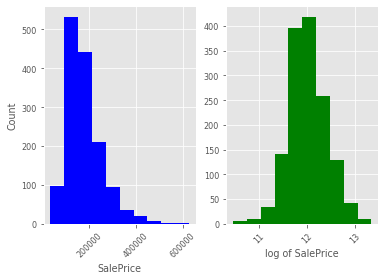

In [24]:
fig, axs = plt.subplots(1,2)   
axs[0].hist(Price,color='b')
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_ylabel('Count')
axs[0].set_xlabel('SalePrice')
    
axs[1].hist(log_Price,color='g')
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_xlabel('log of SalePrice')
print('SalePrice is right skewed (left plot).')
print('For the output/dependent variable, the log of SalePrice taken.')
print('This is so the residuals of a linear model would be normal.')

#### 2. Label Encode the Categorical Variables

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

#for cvar in catlist:   
#    PriceFeatures[cvar]= label_encoder.fit_transform(PriceFeatures[cvar]) 

In [26]:
PriceFeatures.head()

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,AgeHome,YrsSinceRemodel,Num_Bathrms_AbvGrd,Num_Bathrms_Bsmt
0,65.0,8450,7,196.0,706,150,856,856,854,1710,3,1,8,0,2,548,0,61,5,5,3,1
1,80.0,9600,6,0.0,978,284,1262,1262,0,1262,3,1,6,1,2,460,298,0,31,31,2,1
2,68.0,11250,7,162.0,486,434,920,920,866,1786,3,1,6,1,2,608,0,42,7,6,3,1
3,60.0,9550,7,0.0,216,540,756,961,756,1717,3,1,7,1,3,642,0,35,91,36,1,1
4,84.0,14260,8,350.0,655,490,1145,1145,1053,2198,4,1,9,1,3,836,192,84,8,8,3,1


#### 3. Train Test Split

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    PriceFeatures, log_Price, test_size=0.2, 
    random_state=0)

In [28]:
X_train.head()

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,AgeHome,YrsSinceRemodel,Num_Bathrms_AbvGrd,Num_Bathrms_Bsmt
482,80.0,9600,5,0.0,607,506,1113,1113,0,1113,3,1,5,1,1,264,0,80,59,2,1,0
1050,41.0,4920,8,0.0,616,722,1338,1338,0,1338,2,1,6,0,2,582,0,0,9,9,2,1
670,52.0,9022,5,0.0,0,768,768,792,0,792,2,1,5,0,1,240,316,0,85,3,1,0
1239,68.0,17542,7,0.0,125,36,1192,1516,651,2167,3,1,9,2,2,518,220,47,33,4,3,1
530,74.0,9056,8,0.0,0,707,707,707,707,1414,3,1,6,1,2,403,100,35,2,2,3,0


#### 4. Standardize the numerical variables

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

t = [('num', StandardScaler(), num_indx)]
transf = ColumnTransformer(transformers=t,
                           remainder='passthrough')

In [30]:
X_train_scaled = transf.fit_transform(X_train)
X_test_scaled = transf.transform(X_test)

In [31]:
X_train_scaled.shape

(1152, 22)

<ipython-input-32-3f0e3c5f6e20>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1,2)


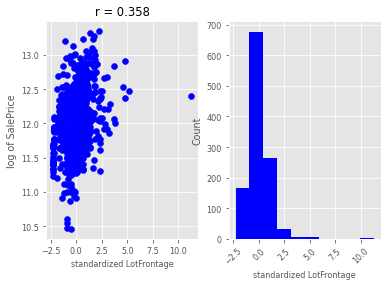

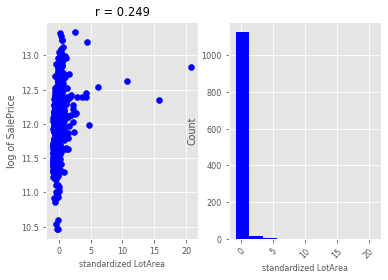

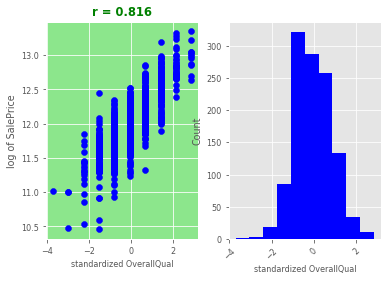

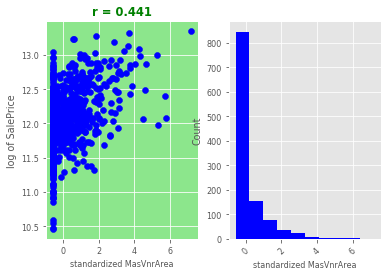

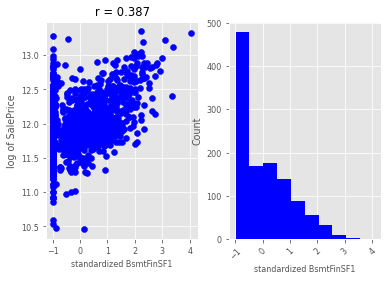

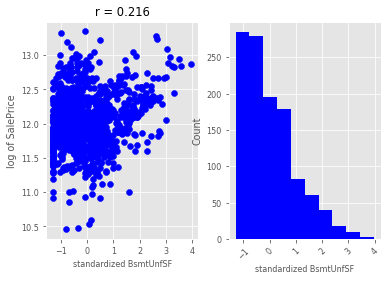

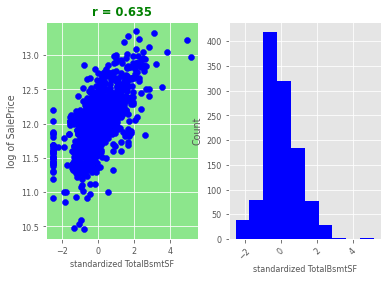

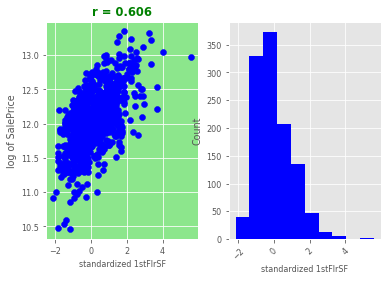

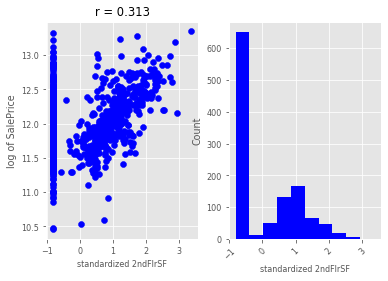

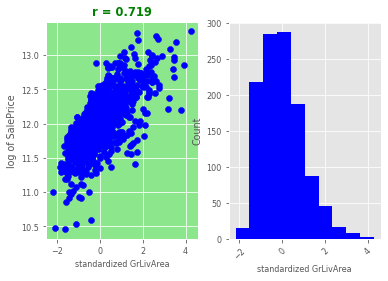

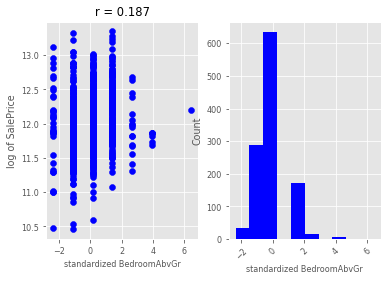

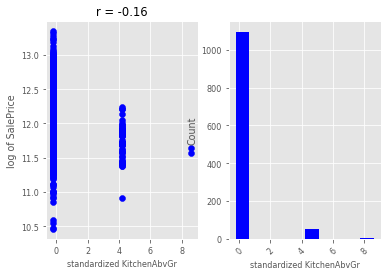

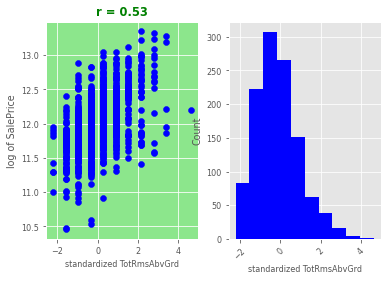

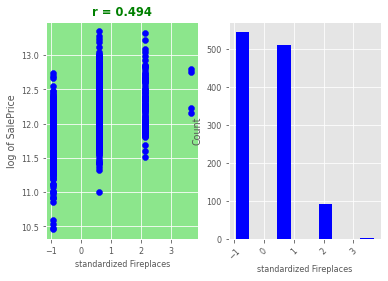

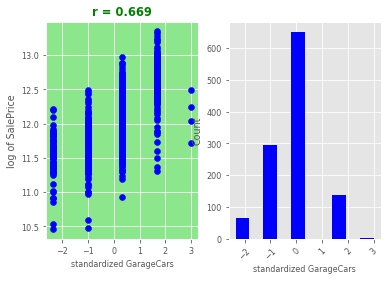

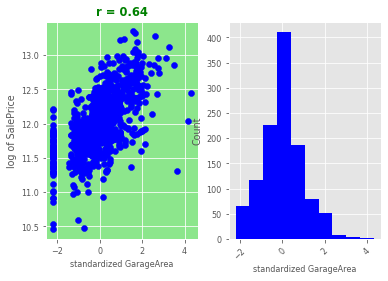

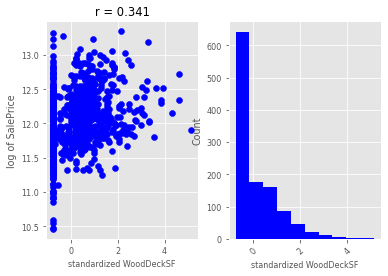

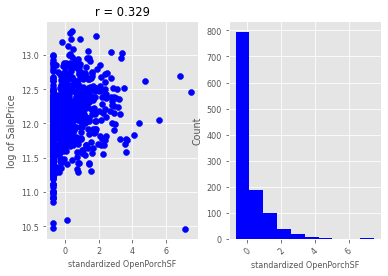

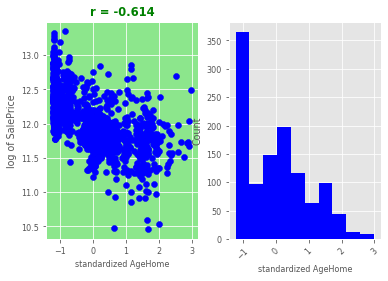

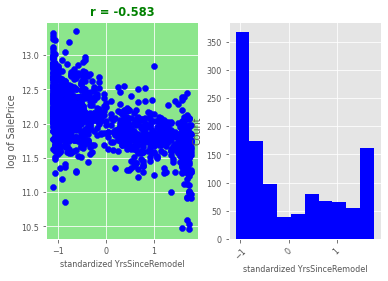

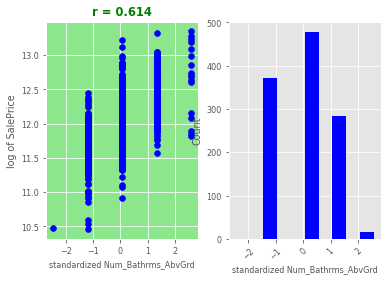

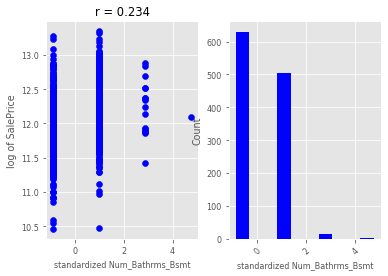

In [32]:
# plotting the standardized numerical variables vs.
     # log of SalePrice
    
import numpy.ma as ma # need this to allow corrcoef to handle the nan rows

# correlation threshold, used to highlight particular figures 
corr_thrshld = 0.4

fcnt = 0
for Feat in X_train.columns[num_indx]:
    fig, axs = plt.subplots(1,2) 
    x = X_train_scaled[:,fcnt]
    y = y_train
    
    axs[0].scatter(x,y,color='b')
    axs[0].set_xlabel('standardized ' + Feat,fontsize = 8)
    axs[0].set_ylabel('log of SalePrice')
    fcnt +=1
    
    r = ma.corrcoef(ma.masked_invalid(x), 
                ma.masked_invalid(y))
    
    if np.abs(r[0,1]) >= corr_thrshld:
        axs[0].set_title(('r = '+ str(round(r[0,1],3))), fontweight = 'bold',color='g')
        axs[0].set_facecolor('#8ce68c')
        
    elif np.abs(r[0,1]) < corr_thrshld:
        axs[0].set_title(('r = ' + str(round(r[0,1],3))))
        
    
    # Histogram
    axs[1].hist(x,color='b')
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].set_ylabel('Count')
    axs[1].set_xlabel('standardized ' + Feat,fontsize = 8)

# III. Train Models

My Functions

In [33]:
def get_residuals(model, X, Y):
    
    residuals = Y - model.predict(X)
    
    return residuals

In [34]:
def model_evaluate(model, X, Y):
    import numpy as np
    from sklearn.metrics import mean_squared_error, r2_score

    rmse = mean_squared_error(Y, 
                            model.predict(X), 
                            squared = False)
    r2 = r2_score(Y, model.predict(X))
    
    if len(np.where(model.predict(X)>20)[0]) > 0: # specific to this dataset
        # Issue, model prediction is too large
        rmse_dollars = np.nan
    else:
        rmse_dollars = mean_squared_error(np.exp(Y), 
                            np.exp(model.predict(X)), 
                            squared = False)

    print('RMSE Logarithmic: ', rmse)
    print('r^2: ', r2)
    print('RMSE: $', rmse_dollars)
    
    return rmse, r2, rmse_dollars

In [35]:
def plot_the_model(model, x_train, y_train, x_test, y_test):
    import numpy as np
    from matplotlib import pyplot as plt

    fig, axs = plt.subplots(1,2) 
    fig.set_figheight(5)
    fig.set_figwidth(10)

    x = np.linspace(10, 14.5, 100)
    y = np.linspace(10, 14.5, 100)
    
    # --------------------------------
    # Plot the Actual vs. Predicted
    # --------------------------------
    axs[0].scatter(model.predict(x_train), 
         y_train, color='k')
    axs[0].plot(x,y, 'r-')
 
    axs[0].set_ylabel('Actual log of Sale Price')
    axs[0].set_xlabel('Predicted log of Sale Price')
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].legend(['line','Train'])
    
    axs[1].scatter(model.predict(x_test), 
         y_test, color='magenta') 
    axs[1].plot(x,y, 'r-')

    axs[1].set_ylabel('Actual log of Sale Price')
    axs[1].set_xlabel('Predicted log of Sale Price')
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].legend(['line','Test'])

In [36]:
print('For the grid search (max_features):')
print('Number of Features = ', X_train_scaled.shape[1])
print('sqrt of Number of Features = ', np.sqrt(X_train_scaled.shape[1]))

For the grid search (max_features):
Number of Features =  22
sqrt of Number of Features =  4.69041575982343


In [37]:
def get_RandomForests_model(X, Y):
    from sklearn import ensemble
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import KFold

    skfold = KFold(n_splits=3, shuffle=True, random_state=0)
    gs_randomForest = ensemble.RandomForestRegressor()

    grid_para_forest = [{
        "n_estimators": [500, 1000, 2000],
        "max_features": [4, 5, 6, 8],
        "min_samples_split":[2, 4, 6, 8, 10],
        "random_state": [42]}]
    gs = GridSearchCV(gs_randomForest, 
                        grid_para_forest, 
                        scoring='r2', 
                        cv = skfold,
                        n_jobs=-1)
    %time gs.fit(X, Y)
    
    model = gs.best_estimator_
    
    print('Random Forests model object created.')
    print(gs.best_estimator_)
    
    return model

In [38]:
def get_GradientBoosting_model(X, Y):
    from sklearn import ensemble
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import KFold

    skfold = KFold(n_splits=3, shuffle=True, random_state=0)
    gs_gbm = GradientBoostingRegressor()

    grid_for_gbm = [{
        "learning_rate": [0.001, 0.005, 0.01],
        "n_estimators": [500, 1000, 2000],
        "max_features": [4, 5, 6, 8],
        "min_samples_split":[2, 4, 6, 8, 10],
        "random_state": [42]}]
    gs = GridSearchCV(gs_gbm, 
                        grid_for_gbm, 
                        scoring='r2', 
                        cv = skfold,
                        n_jobs=-1)
    %time gs.fit(X, Y)
    
    model = gs.best_estimator_
    
    print('Random Forests model object created.')
    print(gs.best_estimator_)
    
    return model

In [39]:
# initializing these variables for model comparision
model_descrp = []
r2_log_train = []
r2_log_test = []
rmse_log_train = []
rmse_log_test = []
rmse_dollars_train = []
rmse_dollars_test = []

In [40]:
# I found myself copying this text over and over, 
# so, I created a function for it

def append_myMetrics(which_model, r2_train, r2_test, rmse_train, rmse_test, rmse_train_dollars, rmse_test_dollars):
    
    r2_log_train_temp = r2_train
    r2_log_test_temp = r2_test
    rmse_log_train_temp = rmse_train
    rmse_log_test_temp = rmse_test
    rmse_dollars_train_temp = rmse_train_dollars
    rmse_dollars_test_temp = rmse_test_dollars

    model_descrp.append(which_model)
    if r2_log_train_temp <= 1 and r2_log_train_temp > 0:
        r2_log_train.append(r2_log_train_temp)
    elif r2_log_train_temp > 1:   
        r2_log_train.append(1000)
    else:
        r2_log_train.append(-1000)

    if r2_log_test_temp <= 1 and r2_log_test_temp > 0:
        r2_log_test.append(r2_log_test_temp)
    elif r2_log_test_temp > 1:   
        r2_log_test.append(1000)
    else:
        r2_log_test.append(-1000)
    
    if rmse_log_train_temp <= 10:
        rmse_log_train.append(rmse_log_train_temp)
    elif rmse_log_train_temp > 10:   
        rmse_log_train.append(1000)

    if rmse_log_test_temp <= 10:
        rmse_log_test.append(rmse_log_test_temp)
    elif rmse_log_test_temp > 10:   
        rmse_log_test.append(1000)
    
    rmse_dollars_train.append(rmse_dollars_train_temp)
    rmse_dollars_test.append(rmse_dollars_test_temp)

## Model 5 : Random Forests - Grid Search 

In [41]:
rf_model = get_RandomForests_model(X_train_scaled, y_train)

/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


CPU times: user 4.65 s, sys: 336 ms, total: 4.99 s
Wall time: 1min 20s
Random Forests model object created.
RandomForestRegressor(max_features=5, n_estimators=2000, random_state=42)


In [42]:
rmse_train, r2_train, rmse_train_dollars= model_evaluate(rf_model, X_train_scaled, y_train)

RMSE Logarithmic:  0.0522246771351819
r^2:  0.983050558271916
RMSE: $ 10448.949789737491


In [43]:
rmse_test, r2_test, rmse_test_dollars= model_evaluate(rf_model, X_test_scaled, y_test)

RMSE Logarithmic:  0.12634412675562035
r^2:  0.8867389056789461
RMSE: $ 20712.253548596345


Text(0.5, 0, 'Residual')

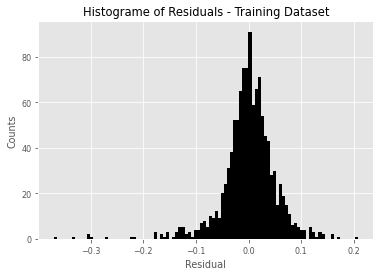

In [44]:
residuals_train = get_residuals(rf_model, X_train_scaled, y_train)
plt.hist(residuals_train, 100, facecolor = 'black');
plt.title('Histograme of Residuals - Training Dataset')
plt.ylabel('Counts')
plt.xlabel('Residual')

Text(0.5, 0, 'Residual')

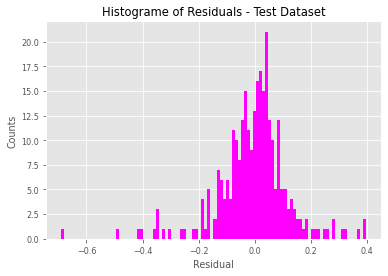

In [45]:
residuals_test = get_residuals(rf_model, X_test_scaled, y_test)
plt.hist(residuals_test, 100, facecolor = 'magenta');
plt.title('Histograme of Residuals - Test Dataset')
plt.ylabel('Counts')
plt.xlabel('Residual')

Random Forest Model


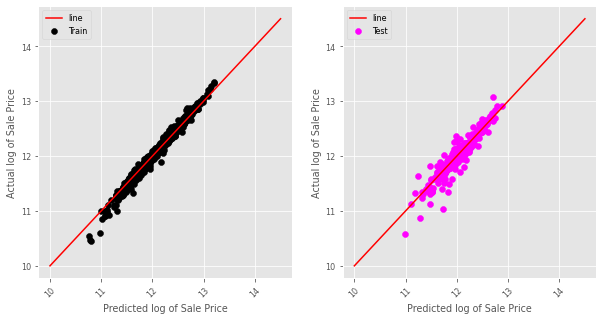

In [46]:
print('Random Forest Model');
plot_the_model(rf_model, X_train_scaled, y_train, X_test_scaled, y_test)

In [47]:
which_model = 'Random Forests'
append_myMetrics(which_model, r2_train, r2_test, rmse_train, rmse_test, rmse_train_dollars, rmse_test_dollars)

## Model 6 : Gradient Boosting - Grid Search

In [48]:
gb_model = get_GradientBoosting_model(X_train_scaled, y_train)

CPU times: user 2.17 s, sys: 198 ms, total: 2.37 s
Wall time: 1min 23s
Random Forests model object created.
GradientBoostingRegressor(learning_rate=0.01, max_features=4,
                          min_samples_split=6, n_estimators=2000,
                          random_state=42)


In [49]:
rmse_train, r2_train, rmse_train_dollars= model_evaluate(gb_model, X_train_scaled, y_train)

RMSE Logarithmic:  0.08351303789731929
r^2:  0.9566576520087205
RMSE: $ 14298.955777738794


In [50]:
rmse_test, r2_test, rmse_test_dollars= model_evaluate(gb_model, X_test_scaled, y_test)

RMSE Logarithmic:  0.12766021269269187
r^2:  0.884367007607073
RMSE: $ 20922.288270133777


Text(0.5, 0, 'Residual')

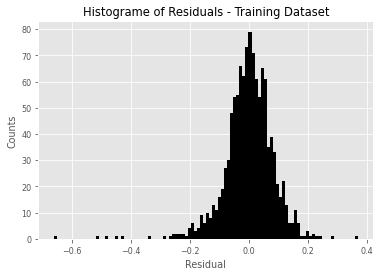

In [51]:
residuals_train = get_residuals(gb_model, X_train_scaled, y_train)
plt.hist(residuals_train, 100, facecolor = 'black');
plt.title('Histograme of Residuals - Training Dataset')
plt.ylabel('Counts')
plt.xlabel('Residual')

Text(0.5, 0, 'Residual')

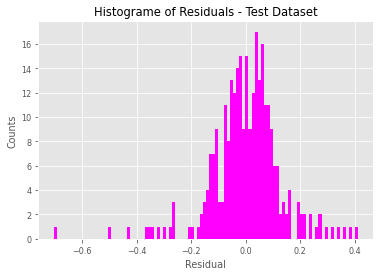

In [52]:
residuals_test = get_residuals(gb_model, X_test_scaled, y_test)
plt.hist(residuals_test, 100, facecolor = 'magenta');
plt.title('Histograme of Residuals - Test Dataset')
plt.ylabel('Counts')
plt.xlabel('Residual')

Gradient Boosting Model


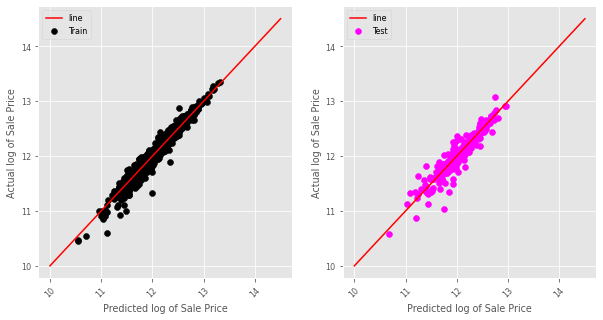

In [53]:
print('Gradient Boosting Model');
plot_the_model(gb_model, X_train_scaled, y_train, X_test_scaled, y_test)

In [54]:
which_model = 'Gradient Boosting'
append_myMetrics(which_model, r2_train, r2_test, rmse_train, rmse_test, rmse_train_dollars, rmse_test_dollars)

# IV. Compare Model Results

In [55]:
pd.options.display.float_format = '{:,.2f}'.format
zipped = list(zip(model_descrp,
                 rmse_log_train, rmse_log_test, 
                 rmse_dollars_train, rmse_dollars_test,
                 r2_log_train, r2_log_test))

results = pd.DataFrame(zipped, columns=['model',
                                       'rmse log train',
                                       'rmse log test',
                                       'rmse train',
                                       'rmse test',
                                       'r2 train',
                                       'r2 test'])

#results.head(10)
results_sorted = results.sort_values('rmse test', ascending = True)
results_sorted.head(10)

,model,rmse log train,rmse log test,rmse train,rmse test,r2 train,r2 test
0,Random Forests,0.05,0.13,"10,448.95","20,712.25",0.98,0.89
1,Gradient Boosting,0.08,0.13,"14,298.96","20,922.29",0.96,0.88


Text(0.5, 0, 'Residual')

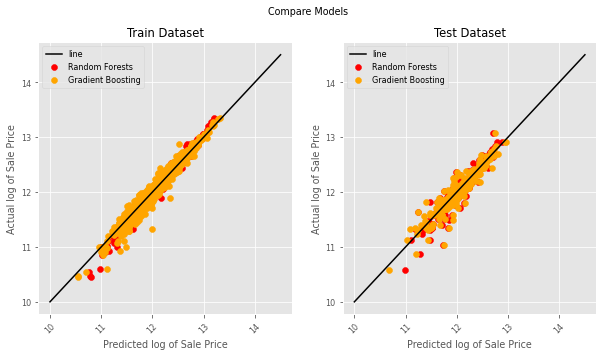

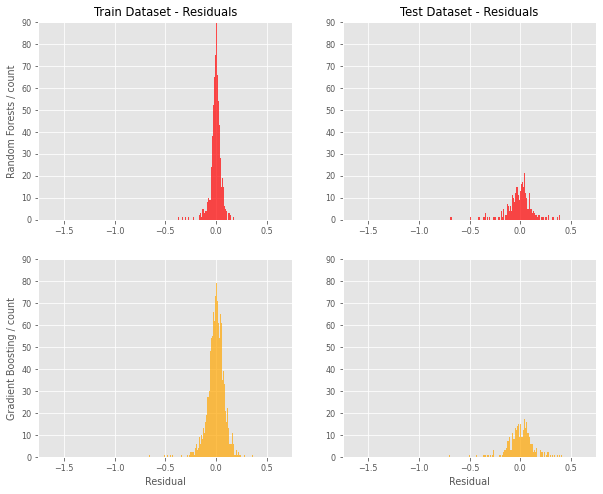

In [56]:
fig, axs = plt.subplots(1,2) 
fig.set_figheight(5)
fig.set_figwidth(10)

# --------------------------------
# Plot the Actual vs. Predicted
# --------------------------------
x = np.linspace(10, 14.5, 100)
y = np.linspace(10, 14.5, 100)
axs[0].plot(x,y, 'k-')
axs[1].plot(x,y, 'k-')

axs[0].scatter(rf_model.predict(X_train_scaled), 
          y_train, color='red')
axs[0].scatter(gb_model.predict(X_train_scaled), 
          y_train, color='orange')
axs[0].set_ylabel('Actual log of Sale Price')
axs[0].set_xlabel('Predicted log of Sale Price')
axs[0].tick_params(axis='x', rotation=45)
axs[0].legend(['line','Random Forests','Gradient Boosting'])
axs[0].set_title('Train Dataset')

axs[1].scatter(rf_model.predict(X_test_scaled), 
          y_test, color='red')
axs[1].scatter(gb_model.predict(X_test_scaled), 
          y_test, color='orange')
axs[1].set_ylabel('Actual log of Sale Price')
axs[1].set_xlabel('Predicted log of Sale Price')
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(['line','Random Forests','Gradient Boosting'])
axs[1].set_title('Test Dataset')
fig.suptitle('Compare Models');

# -----------------------------------
# Plot the Residuals - Training Data
# -----------------------------------
fig, axs = plt.subplots(2,2) 
fig.set_figheight(8)
fig.set_figwidth(10)

axs[0,0].hist(get_residuals(rf_model, X_train_scaled, y_train),
              bins=100, color = 'red', alpha=0.7);
axs[0,0].set_xlim(-1.75,0.75)
axs[0,0].set_ylim(0,90)
axs[0,0].set_ylabel('Random Forests / count')
axs[0,0].set_title('Train Dataset - Residuals')

axs[1,0].hist(get_residuals(gb_model, X_train_scaled, y_train),
              bins=100, color = 'orange', alpha=0.7);
axs[1,0].set_xlim(-1.75,0.75)
axs[1,0].set_ylim(0,90)
axs[1,0].set_ylabel('Gradient Boosting / count')
axs[1,0].set_xlabel('Residual')

# -------------------------------------------------------------
axs[0,1].hist(get_residuals(rf_model, X_test_scaled, y_test),
              bins=100, color = 'red', alpha=0.7);
axs[0,1].set_xlim(-1.75,0.75)
axs[0,1].set_ylim(0,90)
axs[0,1].set_title('Test Dataset - Residuals')

axs[1,1].hist(get_residuals(gb_model, X_test_scaled, y_test),
              bins=100, color = 'orange', alpha=0.7);
axs[1,1].set_xlim(-1.75,0.75)
axs[1,1].set_ylim(0,90)
axs[1,1].set_xlabel('Residual')

# V. Dig into Gradient Boosting Model

In [57]:
gb_model.get_params

<bound method BaseEstimator.get_params of GradientBoostingRegressor(learning_rate=0.01, max_features=4,
                          min_samples_split=6, n_estimators=2000,
                          random_state=42)>

                    Features_Importance
OverallQual                        0.20
GrLivArea                          0.15
AgeHome                            0.10
GarageCars                         0.08
YrsSinceRemodel                    0.07
TotalBsmtSF                        0.06
Fireplaces                         0.05
Num_Bathrms_AbvGrd                 0.05
1stFlrSF                           0.04
GarageArea                         0.04
BsmtFinSF1                         0.03
LotArea                            0.03
2ndFlrSF                           0.02
LotFrontage                        0.01
TotRmsAbvGrd                       0.01
OpenPorchSF                        0.01
MasVnrArea                         0.01
Num_Bathrms_Bsmt                   0.01
WoodDeckSF                         0.00
BsmtUnfSF                          0.00
KitchenAbvGr                       0.00
BedroomAbvGr                       0.00


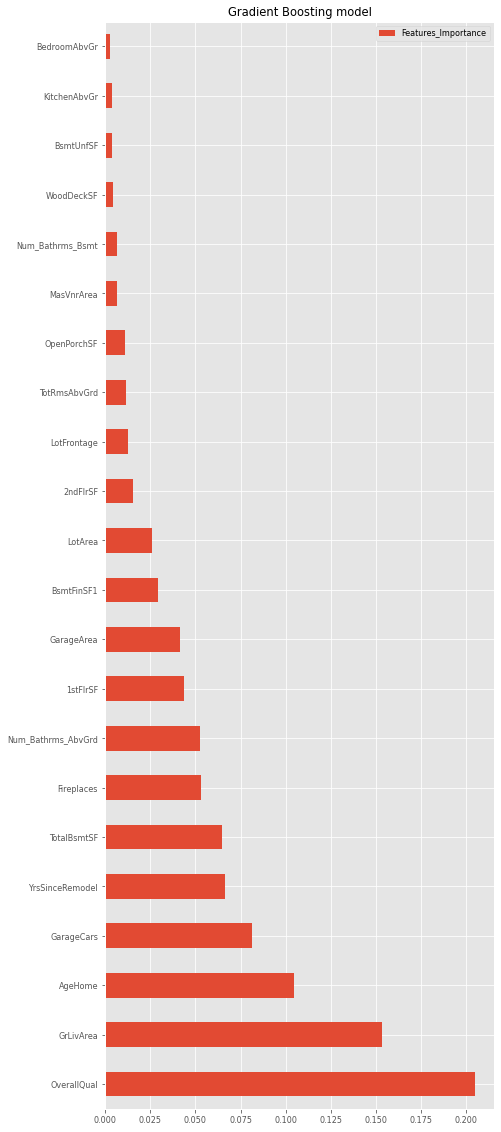

In [58]:
coefs_gb = pd.DataFrame(
    gb_model.feature_importances_,
    columns=["Features_Importance"],
    index=PriceFeatures.columns,
)

coefs_gb_sorted = coefs_gb.sort_values('Features_Importance', ascending = False)
print(coefs_gb_sorted.head(100))

coefs_gb_sorted.plot(kind="barh", figsize=(9, 20))
plt.title("Gradient Boosting model")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)